In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Reading the data
data = pd.read_csv('data/hour.csv',sep=',')

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
seasonMap = {1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" }
weatherMap = {1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
              2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
              3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
              4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " }

data['date']  = data.dteday.apply(lambda x:x.split()[0])
data['weekday'] = data.date.apply(lambda dateString:calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
data["season"] = data.season.map(seasonMap)
data['weather'] = data.weathersit.map(weatherMap)

categoryVariableList = ["hr","weekday","mnth","season","weather","holiday","workingday"]
for var in categoryVariableList:
    data[var] = data[var].astype("category")
    
data = data.drop(["dteday"],axis=1)

In [5]:
data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,weather
0,1,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
1,2,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
2,3,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
3,4,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...
4,5,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01,Clear + Few clouds + Partly cloudy + Partly c...


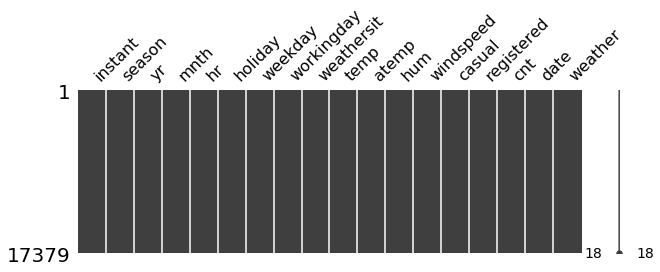

In [6]:
# Missing data detection
import missingno as msno
msno.matrix(data,figsize=(10,3))
# as we have no white spaces in between hence no missing data

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count/Working Day Distribution')]

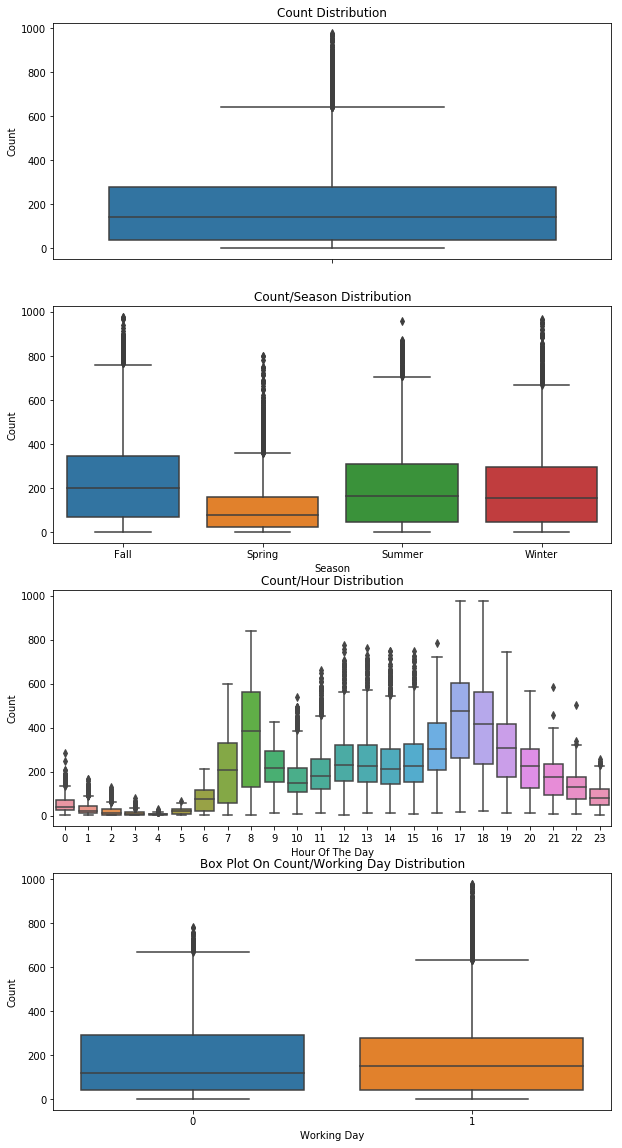

In [7]:
# Outlier detection
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0])
sns.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[2])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[3])

axes[0].set(ylabel='Count',title="Count Distribution")
axes[1].set(xlabel='Season', ylabel='Count',title="Count/Season Distribution")
axes[2].set(xlabel='Hour Of The Day', ylabel='Count',title="Count/Hour Distribution")
axes[3].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count/Working Day Distribution")

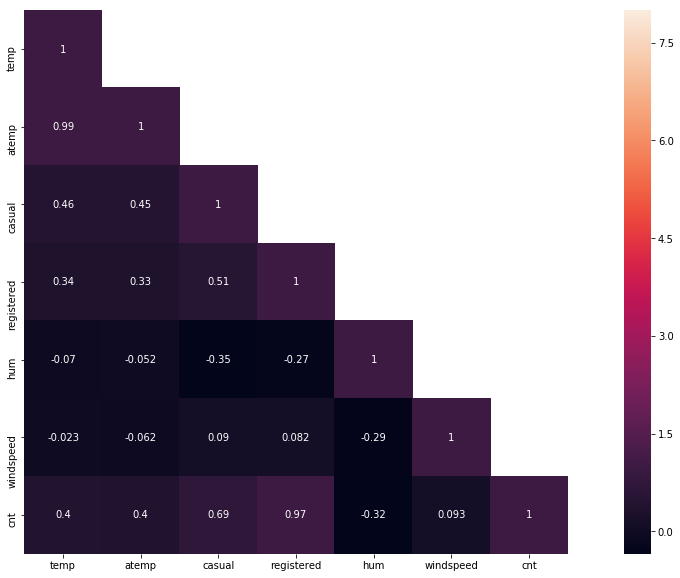

In [8]:
# Correlation analysis
corr = data[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False # Return the indices for the lower-triangle of arr.
fig, ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=8,square=True,annot=True)

In [9]:
# Model
data = pd.read_csv('data/hour.csv', sep = ',')
# Separate date
data["date"] = data.dteday.apply(lambda x : x.split()[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [10]:
# Categorical and drop features
categoricalFeatureNames = ["season","holiday","workingday","weathersit","weekday","mnth","yr","hr"]
numericalFeatureNames = ["temp","hum","windspeed","atemp"]
dropFeatures = ['casual',"cnt","dteday","date","registered"]

In [11]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [12]:
# Build train and test set
data=data[pd.notnull(data['cnt'])].sort_values(by=["dteday"])
y=data["cnt"]

In [13]:
data=data.drop(dropFeatures,axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=42)

In [15]:
# Create model
from sklearn.ensemble import RandomForestRegressor
rfModel=RandomForestRegressor(n_estimators=500)
rfModel.fit(X=X_train,y=np.log1p(y_train))
preds=rfModel.predict(X=X_test)

In [27]:
np.log(y_test[1])

3.6888794541139363

In [28]:
preds[1]

3.3598998492096883

In [16]:
# Analyze the results
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [17]:
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False))

RMSLE Value For Random Forest:  0.28649517791518


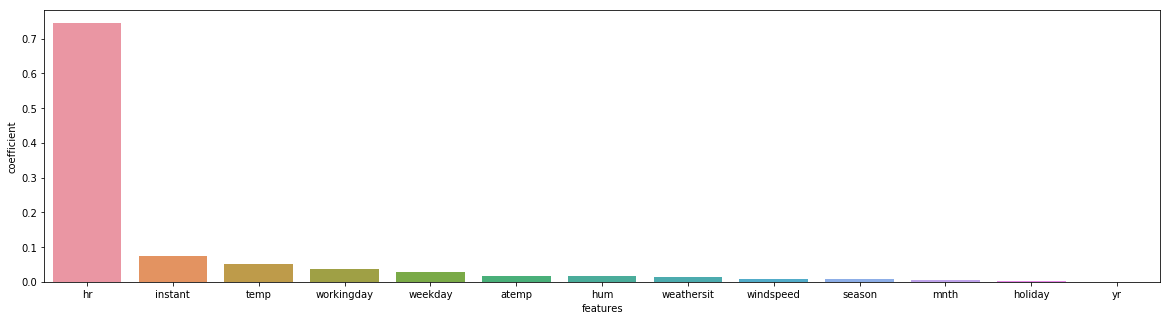

In [19]:
features=pd.DataFrame()
features["features"]=X_train.columns

features["coefficient"]=rfModel.feature_importances_
features.sort_values(by=["coefficient"],ascending=False,inplace=True)
fig,ax=plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=features,x="features",y="coefficient",ax=ax)